In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
hotel_data=pd.read_csv("Hotel_Reservations.csv")
hotel_data.drop("Booking_ID",axis=1,inplace=True)

In [3]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(hotel_data,test_size=0.2,stratify=hotel_data["booking_status"])

In [4]:
scaler=StandardScaler()
num_types=train_data.select_dtypes(include="number").columns
#num_types
train_data[num_types]=scaler.fit_transform(train_data[num_types])
test_data[num_types]=scaler.transform(test_data[num_types])

In [5]:
ordinal=OrdinalEncoder()
cat_types=train_data.select_dtypes(include="object").columns
cat_types=cat_types[:-1]
#cat_types
train_data[cat_types]=ordinal.fit_transform(train_data[cat_types])
test_data[cat_types]=ordinal.transform(test_data[cat_types])

In [6]:
label=LabelEncoder()
train_data["booking_status"]=label.fit_transform(train_data["booking_status"])
test_data["booking_status"]=label.transform(test_data["booking_status"])

In [7]:
train_data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
13193,-1.626009,-0.26213,1.372401,0.565417,0.0,-0.180129,3.0,-0.842082,0.46816,-1.767407,1.420293,4.0,-0.162657,-0.062988,-0.088774,0.415331,-0.786108,1
12565,0.300533,-0.26213,0.221462,-0.143033,0.0,-0.180129,0.0,-0.331352,0.46816,-1.116459,-0.524311,4.0,-0.162657,-0.062988,-0.088774,0.054362,-0.786108,0
30915,2.227075,-0.26213,1.372401,-0.143033,0.0,-0.180129,3.0,-0.470642,0.46816,-1.441933,0.390797,4.0,-0.162657,-0.062988,-0.088774,0.588710,0.485228,0
22386,2.227075,-0.26213,-0.929476,1.273868,0.0,-0.180129,3.0,-0.134025,0.46816,-0.140037,-0.295534,4.0,-0.162657,-0.062988,-0.088774,0.975259,3.027899,1
15647,0.300533,-0.26213,-0.929476,0.565417,0.0,-0.180129,3.0,-0.435820,0.46816,-1.441933,1.763459,4.0,-0.162657,-0.062988,-0.088774,0.028781,-0.786108,1


still need to remove outliers

<AxesSubplot: >

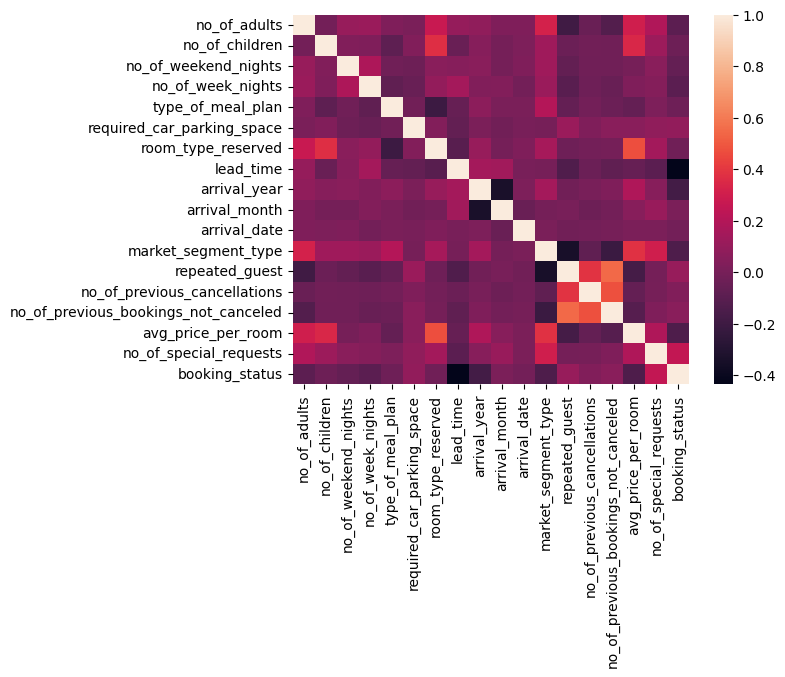

In [8]:
import seaborn as sns
corr=train_data.corr()
sns.heatmap(corr)

In [9]:
corr["booking_status"].sort_values(ascending=False)

booking_status                          1.000000
no_of_special_requests                  0.253706
repeated_guest                          0.107058
required_car_parking_space              0.089972
no_of_previous_bookings_not_canceled    0.060890
no_of_previous_cancellations            0.030857
arrival_month                           0.015433
arrival_date                           -0.014723
room_type_reserved                     -0.025089
type_of_meal_plan                      -0.027215
no_of_children                         -0.033776
no_of_weekend_nights                   -0.065700
no_of_adults                           -0.088573
no_of_week_nights                      -0.096244
market_segment_type                    -0.140330
avg_price_per_room                     -0.144356
arrival_year                           -0.183026
lead_time                              -0.436072
Name: booking_status, dtype: float64

In [10]:
from imblearn import over_sampling

over_sampler=over_sampling.RandomOverSampler()
x_res,y_res=over_sampler.fit_resample(train_data.iloc[:,:-1],train_data["booking_status"])

In [15]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression()
classifier.fit(x_res,y_res)
pred=classifier.predict(test_data.iloc[:,:-1])
from sklearn.metrics import f1_score
print(f1_score(test_data["booking_status"],pred))
print((classification_report(test_data["booking_status"] , pred)))
print(confusion_matrix(test_data["booking_status"],pred))

0.8233013890384409
              precision    recall  f1-score   support

           0       0.63      0.75      0.69      2377
           1       0.87      0.78      0.82      4878

    accuracy                           0.77      7255
   macro avg       0.75      0.77      0.75      7255
weighted avg       0.79      0.77      0.78      7255

[[1791  586]
 [1055 3823]]


In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models=[GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]
for i in models:
    i.fit(x_res,y_res)
    pred=i.predict(test_data.iloc[:,:-1])
    print(i)
    print(f1_score(test_data["booking_status"],pred))
    print((classification_report(test_data["booking_status"] , pred)))
    print(confusion_matrix(test_data["booking_status"],pred))
    print("")

GaussianNB()
0.24777817276928543
              precision    recall  f1-score   support

           0       0.36      0.98      0.52      2377
           1       0.93      0.14      0.25      4878

    accuracy                           0.42      7255
   macro avg       0.64      0.56      0.39      7255
weighted avg       0.74      0.42      0.34      7255

[[2326   51]
 [4181  697]]

SVC()
0.853462157809984
              precision    recall  f1-score   support

           0       0.68      0.81      0.74      2377
           1       0.90      0.81      0.85      4878

    accuracy                           0.81      7255
   macro avg       0.79      0.81      0.80      7255
weighted avg       0.83      0.81      0.82      7255

[[1915  462]
 [ 903 3975]]

DecisionTreeClassifier()
0.8964591720863013
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      2377
           1       0.90      0.89      0.90      4878

    accuracy             